# Predicting Salary using Years-Experience

In [1]:
#  Loading the libraries
import pandas as  pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm


In [2]:
# Loadimg the libraries
df=pd.read_csv('E://EXCELR//Data science//Data science assignment//4) Simple Regression//Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.shape

(30, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# Checking for normal distribution and outlier detection using histogram and boxplot

C:\Users\91771\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91771\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


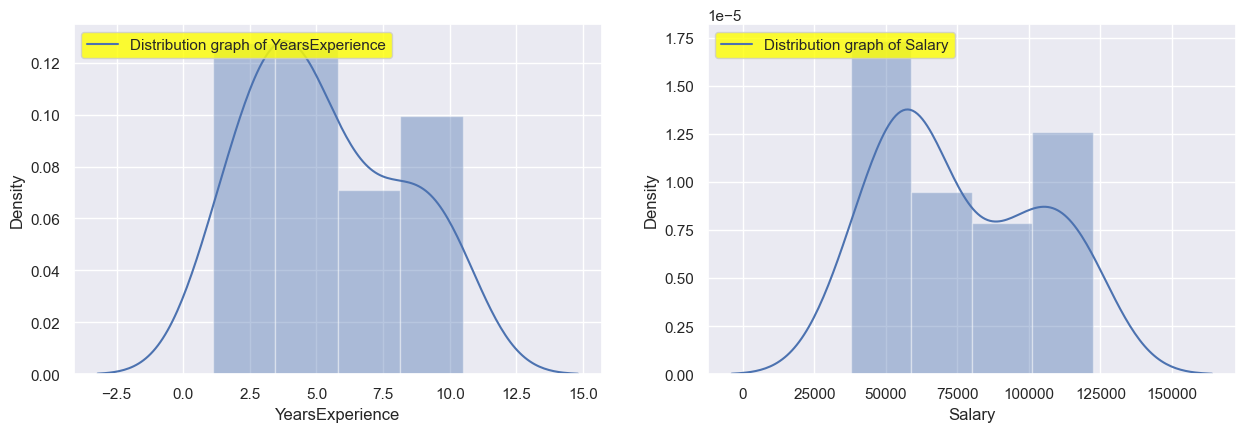

In [11]:
# Visualizing the distribution
sns.set(rc={'figure.figsize':(15,10)})

# creating first plot
plt.subplot(2,2,1)
ax=sns.distplot(df['YearsExperience'])
plt.legend(['Distribution graph of YearsExperience'],loc='upper left',facecolor='yellow')

# Creating second plot
plt.subplot(2,2,2)
ax= sns.distplot(df['Salary'])
plt.legend(['Distribution graph of Salary'],loc='upper left',facecolor='yellow')

plt.show()

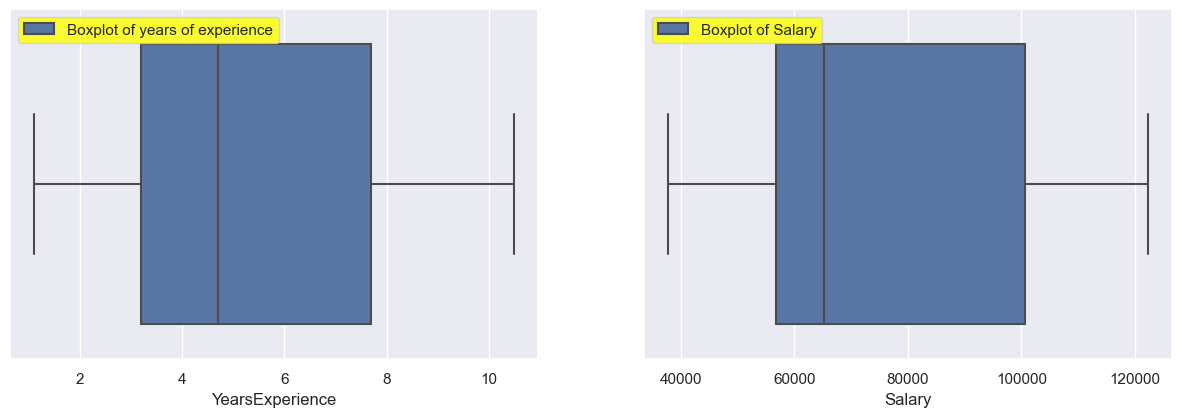

No outlier are present


In [14]:
# Boxplots
sns.set(rc={'figure.figsize':(15,10)})

#creating boxplot
plt.subplot(2,2,1)
ax=sns.boxplot(x=df['YearsExperience'])
plt.legend(['Boxplot of years of experience'],loc='upper left',facecolor='yellow')

# creating second plot
plt.subplot(2,2,2)
ax=sns.boxplot(x=df['Salary'])
plt.legend(['Boxplot of Salary'],loc='upper left',facecolor='yellow')

plt.show()
print('No outlier are present')

# Checking corelation between input and output variable using scatter plot and correleation matrix

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

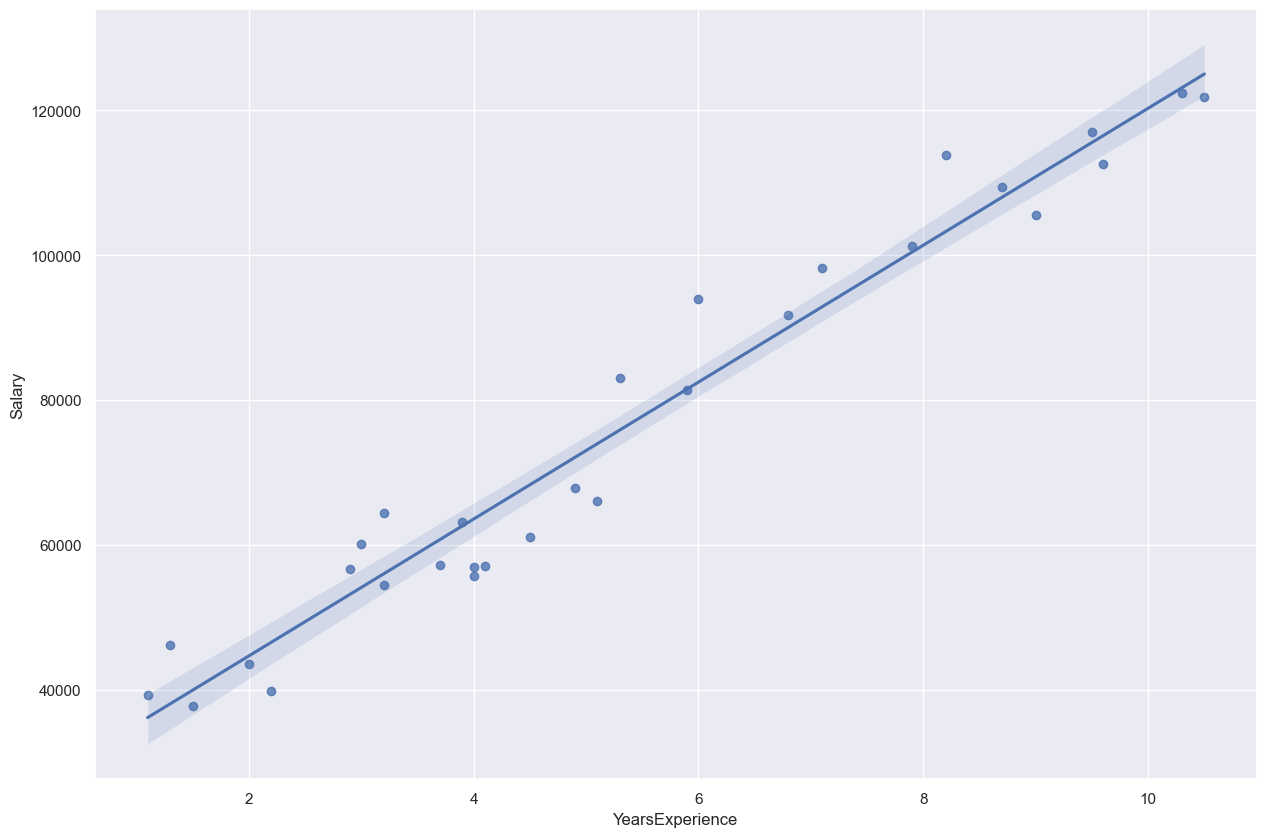

In [15]:
sns.regplot(x='YearsExperience',y='Salary',data=df)

In [18]:
df.corr()
print('There is high correlation (0.978) between Salary and YearsExperience')

There is high correlation (0.978) between Salary and YearsExperience


# Model1 - Using raw data only ithout standardization and transformation

In [19]:
model_1=smf.ols('Salary~YearsExperience',data=df).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           1.14e-20
Time:                        10:49:56   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# Calculating RMSE for model 1
from sklearn.metrics import mean_squared_error
mse = mean_squared_error
pred_1=model_1.predict(df['YearsExperience'])
rmse_1=np.sqrt(mse(df['Salary'],pred_1))
print("RMSE for first model is:",rmse_1)

RMSE for first model is: 5592.043608760662


# Model 2 - Using standardization on x and y

In [20]:
# CConverting the dataframe to an array
from sklearn.preprocessing import StandardScaler
array_salary=df.values
standard_salary=StandardScaler().fit(array_salary).transform(array_salary)
standard_salary[0:5]

array([[-1.51005294, -1.36011263],
       [-1.43837321, -1.10552744],
       [-1.36669348, -1.419919  ],
       [-1.18749416, -1.20495739],
       [-1.11581443, -1.33978143]])

In [21]:
# Sepaerating the array into X and Y before fitting using OLS
X=standard_salary[:,0]
Y=standard_salary[:,1]
model_2=sm.OLS(Y,X).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              644.7
Date:                Wed, 17 Jan 2024   Prob (F-statistic):                    2.33e-21
Time:                        10:54:00   Log-Likelihood:                          4.6151
No. Observations:                  30   AIC:                                     -7.230
Df Residuals:                      29   BIC:                                     -5.829
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9782      0.039     25.392      0.000       0.899       1.057
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# calculating RMSE value of model2
pred_2=model_2.predict(X)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error
rmse_2=np.sqrt(mse(Y,pred_2))
print('RMSE value : ',rmse_2)

RMSE value :  0.20746887924816934


# Model 3- Using Normalization on X and Y

In [26]:
# Using MinMaxScaler to get normalized values of dataframe
from sklearn.preprocessing import MinMaxScaler
array_salary=df.values
norm_salary=MinMaxScaler().fit(array_salary).transform(array_salary)
norm_salary[0:5]

array([[0.        , 0.01904087],
       [0.0212766 , 0.1000945 ],
       [0.04255319, 0.        ],
       [0.09574468, 0.06843846],
       [0.11702128, 0.02551382]])

In [27]:
# spliting into X and Y
X=norm_salary[:,0]
Y=norm_salary[:,1]
model_3=sm.OLS(Y,X).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              1957.
Date:                Wed, 17 Jan 2024   Prob (F-statistic):                    3.58e-28
Time:                        11:02:09   Log-Likelihood:                          38.606
No. Observations:                  30   AIC:                                     -75.21
Df Residuals:                      29   BIC:                                     -73.81
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0210      0.023     44.238      0.000       0.974       1.068
==============================================================================
Omnibus:                        1.478   Durbin-Watson:                   1.605
Prob(Omnibus):                  0.478   Jarque-Bera (JB):                1.229
Skew:                           0.310   Prob(JB):                        0.541
Kurtosis:                       2.226   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# Calculating RMSE for model3
pred_3=model_3.predict(X)
rmse_3=np.sqrt(mse(Y,pred_3))
print('RMSE value : ',rmse_3)

RMSE value :  0.06681594717770253


# Using transformation on X

In [31]:
df2=df.copy()
df2['log_Experience']=np.log(df2['YearsExperience'])
df2['log_salary']=np.log(df2['Salary'])
df2.head()

,YearsExperience,Salary,log_Experience,log_salary
0,1.1,39343.0,0.095310,10.580073
1,1.3,46205.0,0.262364,10.740843
2,1.5,37731.0,0.405465,10.538237
3,2.0,43525.0,0.693147,10.681091
4,2.2,39891.0,0.788457,10.593906


In [32]:
# checking correlation between transformed X and Y
df2['Salary'].corr(df2['log_Experience'])

0.924061081788264

In [34]:
model_4=smf.ols('Salary~log_Experience',data=df2).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           3.25e-13
Time:                        11:09:20   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
log_Experience  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# Calculating RMSE for model 4
pred_4=model_4.predict(df2['log_Experience'])
rmse_4=np.sqrt(mse(df2['Salary'],pred_4))
print("RMSE for fourth model is:",rmse_4)

RMSE for fourth model is: 10302.893706228308


# Model5- Transformation of Y

In [36]:
# Checking correlation between X and transform Y
df2['YearsExperience'].corr(df2['log_salary'])


0.9653844412504377

In [38]:
model_5=smf.ols('log_salary~YearsExperience',data=df2).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           7.03e-18
Time:                        11:11:59   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
model_5.rsquared

0.9319671194084195

In [41]:
# Calculating RMSE for model 5
pred_5=model_5.predict(df2['YearsExperience'])
rmse_5=np.sqrt(mse(df2['log_salary'],pred_5))
print("RMSE for fourth model is:",rmse_5)

RMSE for fourth model is: 0.0945743684728071


In [47]:
#creating dataframe of results of all models
result_df=pd.DataFrame({'Models':['Raw data','Standardization','Normalization','Transformation on X','Transformation on Y'],
                        'R values':[model_1.rsquared,model_2.rsquared,model_3.rsquared,model_4.rsquared,model_5.rsquared],
                        'RMSE':[rmse_1,rmse_2,rmse_3,rmse_4,rmse_5]})
result_df

,Models,R values,RMSE
0,Raw data,0.956957,5592.043609
1,Standardization,0.956957,0.207469
2,Normalization,0.985398,0.066816
3,Transformation on X,0.853889,10302.893706
4,Transformation on Y,0.931967,0.094574


# The best model is Normalization having R value of 0.985 and RMSE of 0.067

In [ ]:
0...............................................................0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000